# Предсказание технологических показателей

Для решения поставленной задачи - предсказания коэффициента восстановления золота из золотосодержащей руды - необходимо провести подготовку и анализ данных, проверить корректность представленной формулы. Далее с помощью кросс-валидации необходимо получить лучшие параметры для моделей и сделать предсказания на тестовой выборке.

## Подготовка

In [ ]:
#импортируем необходимые модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

Загрузим данные, исследуем их на наличие пропущенных значений и дупликатов.

In [ ]:
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [ ]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Данные не содержат дупликатов:

In [ ]:
test['date'].duplicated().sum()

0

In [ ]:
train['date'].duplicated().sum()

0

In [ ]:
full['date'].duplicated().sum()

0

Обработаем пропущенные значения:

In [ ]:
test['date'] = pd.to_datetime(test['date'])
train['date'] = pd.to_datetime(train['date'])
full['date'] = pd.to_datetime(full['date'])

In [ ]:
test.fillna(method="ffill", inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [ ]:
train.fillna(method="ffill", inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

In [ ]:
full.fillna(method="ffill", inplace = True)
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

Рассмотрим распределение целевых признаков. 

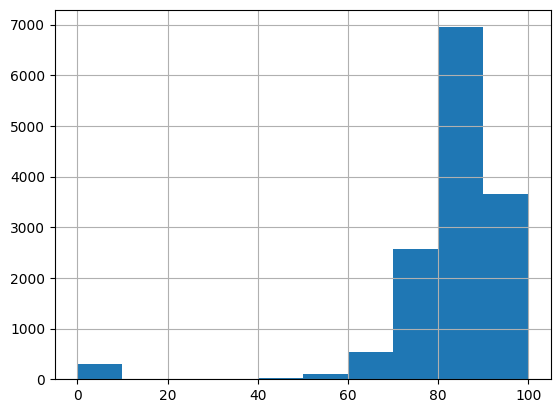

In [ ]:
train['rougher.output.recovery'].hist();

<Axes: >

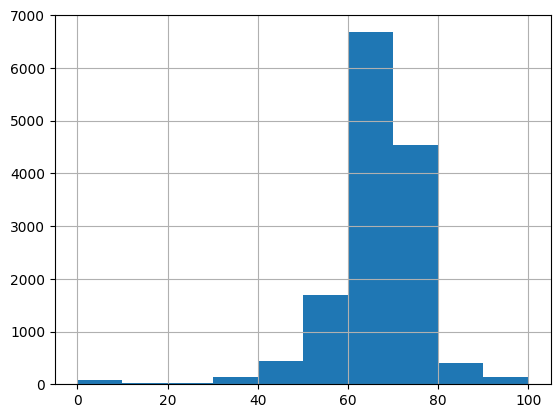

In [ ]:
train['final.output.recovery'].hist()

In [ ]:
#train = train.loc[train['final.output.recovery']>0]
#train = train.loc[train['rougher.output.recovery']>0]

### Проверка предсказаний

Напишем функцию, которая расчитывает коэффициент восстановления из:

conc -доля золота в концентрате после флотации/очистки;

f — доля золота в сырье/концентрате до флотации/очистки;

tail — доля золота в отвальных хвостах после флотации/очистки.

In [ ]:
def rec(conc, f, tail):   
    return 100*(conc*(f - tail)/(f*(conc-tail)))

Сравним рассчитанные по формуле значения c представленными в датасете на примере коэффициента восстановления флотации с помощью MAE.

In [ ]:
y_true = train['rougher.output.recovery']
y_pred = rec(train['rougher.output.concentrate_au'], train['rougher.input.feed_au'], train['rougher.output.tail_au'])
print(y_true.head())
print()
print(y_pred.head())
print()
print('MAE = ', mean_absolute_error(y_true, y_pred))

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

MAE =  9.73512347450521e-15


### Сравнение датасетов

Выведем колонки, которые встречаются в train и full, но не встречаются в test и проанализируем полученные данные:

In [ ]:
col_test = test.columns
col_train = train.columns
col_full = full.columns

In [ ]:
np.setdiff1d(col_test, col_train)

array([], dtype=object)

In [ ]:
np.setdiff1d(col_train, col_test)

array(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag',
       'final.output.tail_au', 'final.output.tail_pb',
       'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       

In [ ]:
np.setdiff1d(col_full, col_test)

array(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag',
       'final.output.tail_au', 'final.output.tail_pb',
       'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       

Все колонки, которые есть в тестовых датасетах, встречаются таккже в других датастетах. 

В тестовом датасете по сравнению с остальными отсутствуют данные о выходных параметрах этапов - это те данные, которые мы не можем включать в анализ при построении моделей.

## Анализ

Рассмотрим, как меняется концентрация металлов: серебра, золота и свинца по мере очистки. 

Text(0.5, 1.0, 'Вторичная очистка')

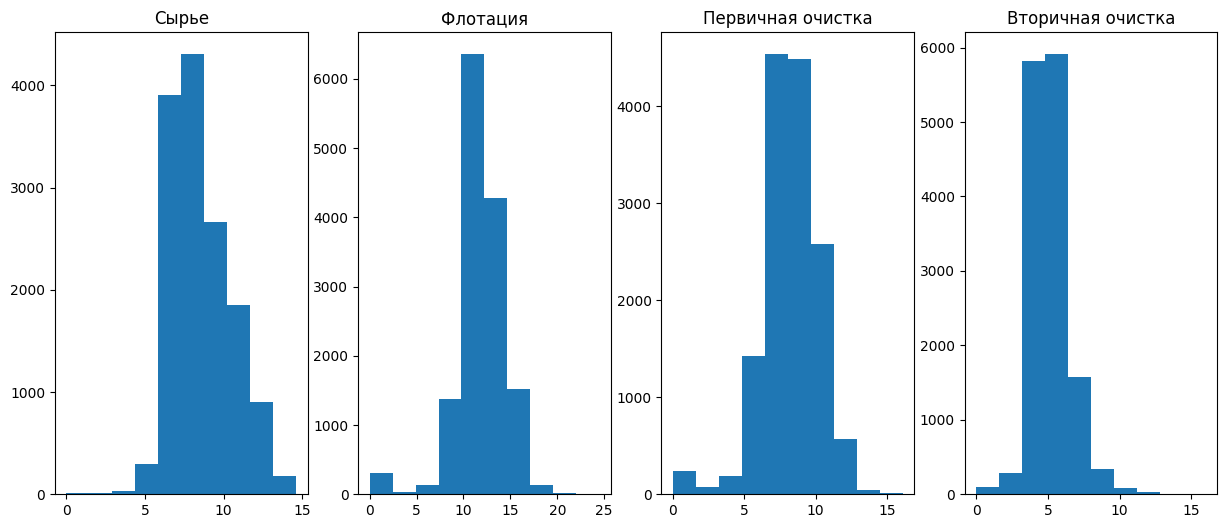

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (15, 6))
ax[0].hist(train['rougher.input.feed_ag'], bins = 10)
ax[0].set_title('Сырье')
ax[1].hist(train['rougher.output.concentrate_ag'], bins = 10)
ax[1].set_title('Флотация')
ax[2].hist(train['primary_cleaner.output.concentrate_ag'], bins = 10)
ax[2].set_title('Первичная очистка')
ax[3].hist(train['final.output.concentrate_ag'], bins = 10)
ax[3].set_title('Вторичная очистка')

In [ ]:
print('Медианные значения')
print('Сырье -', train['rougher.input.feed_ag'].median())
print('Флотация -', train['rougher.output.concentrate_ag'].median())
print('Первичная очистка -', train['primary_cleaner.output.concentrate_ag'].median())
print('Вторичная очистка -', train['final.output.concentrate_ag'].median())

Медианные значения
Сырье - 8.156091639065076
Флотация - 11.747361907693833
Первичная очистка - 8.226247496595931
Вторичная очистка - 4.994606663584227


Концентрация серебра увеличивается во время флотации, но затем уменьшается по мере очистки.

Text(0.5, 1.0, 'Вторичная очистка')

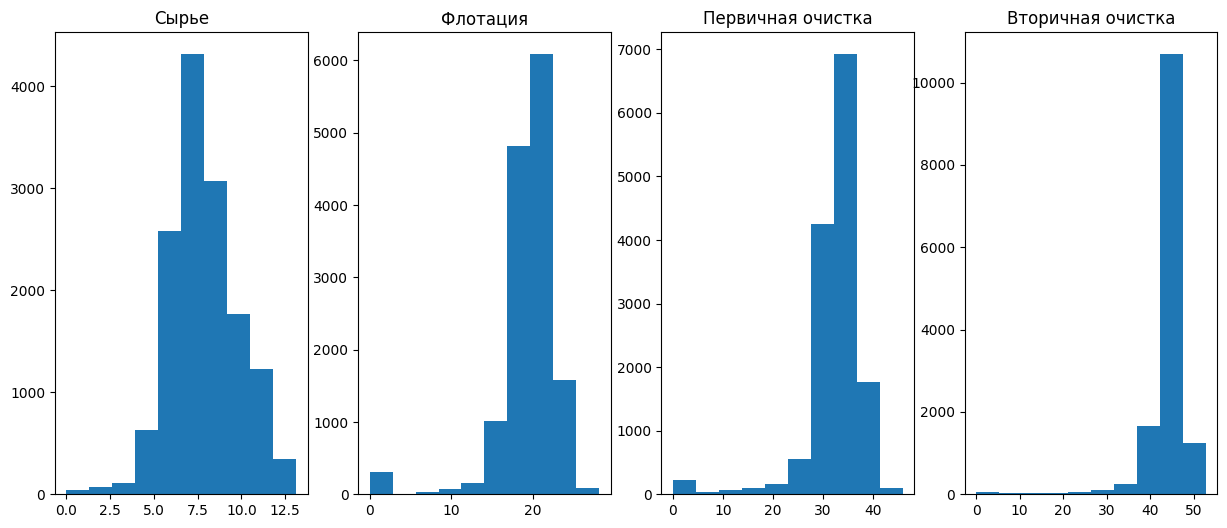

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (15, 6))
ax[0].hist(train['rougher.input.feed_au'], bins = 10)
ax[0].set_title('Сырье')
ax[1].hist(train['rougher.output.concentrate_au'], bins = 10)
ax[1].set_title('Флотация')
ax[2].hist(train['primary_cleaner.output.concentrate_au'], bins = 10)
ax[2].set_title('Первичная очистка')
ax[3].hist(train['final.output.concentrate_au'], bins = 10)
ax[3].set_title('Вторичная очистка')

In [ ]:
print('Медианные значения')
print('Сырье -', train['rougher.input.feed_au'].median())
print('Флотация -', train['rougher.output.concentrate_au'].median())
print('Первичная очистка -', train['primary_cleaner.output.concentrate_au'].median())
print('Вторичная очистка -', train['final.output.concentrate_au'].median())

Медианные значения
Сырье - 7.64913781291615
Флотация - 19.94731246552908
Первичная очистка - 33.22583488845315
Вторичная очистка - 44.87243586194744


Концентрация золота увеличивается, разброс значений уменьшается.

Text(0.5, 1.0, 'Вторичная очистка')

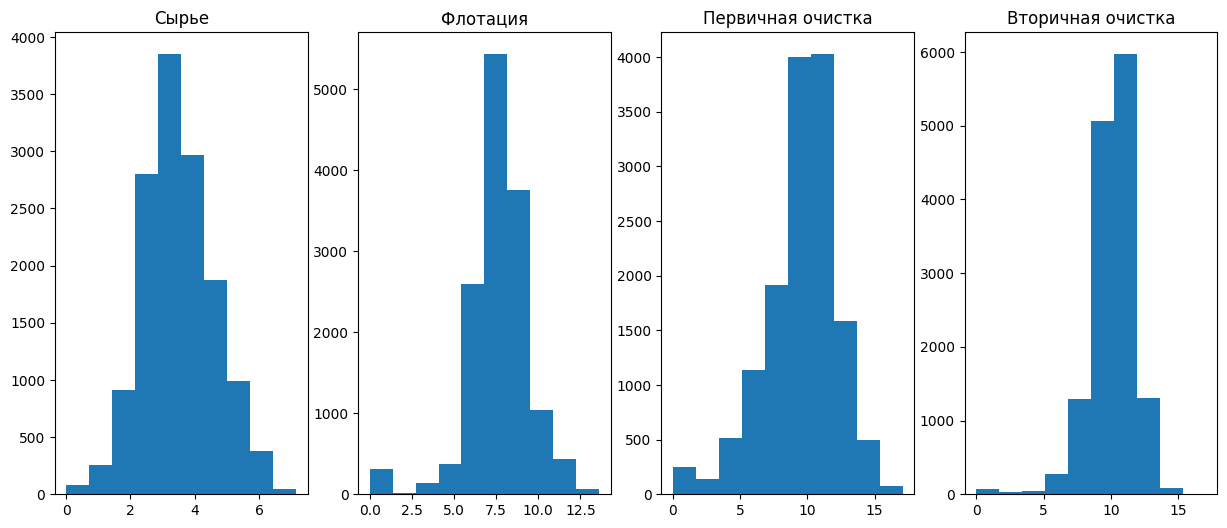

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (15, 6))
ax[0].hist(train['rougher.input.feed_pb'], bins = 10)
ax[0].set_title('Сырье')
ax[1].hist(train['rougher.output.concentrate_pb'], bins = 10)
ax[1].set_title('Флотация')
ax[2].hist(train['primary_cleaner.output.concentrate_pb'], bins = 10)
ax[2].set_title('Первичная очистка')
ax[3].hist(train['final.output.concentrate_pb'], bins = 10)
ax[3].set_title('Вторичная очистка')

In [ ]:
print('Медианные значения')
print('Сырье -', train['rougher.input.feed_pb'].median())
print('Флотация -', train['rougher.output.concentrate_pb'].median())
print('Первичная очистка -', train['primary_cleaner.output.concentrate_pb'].median())
print('Вторичная очистка -', train['final.output.concentrate_pb'].median())

Медианные значения
Сырье - 3.414267466068268
Флотация - 7.7604353941811475
Первичная очистка - 9.920598168902927
Вторичная очистка - 10.297012728585138


Концентрация свинца несколько увеличивается.

### Размеры гранул

Сравним размеры гранул сырья на обучающей и тестовой выборке.

Text(0.5, 1.0, 'test')

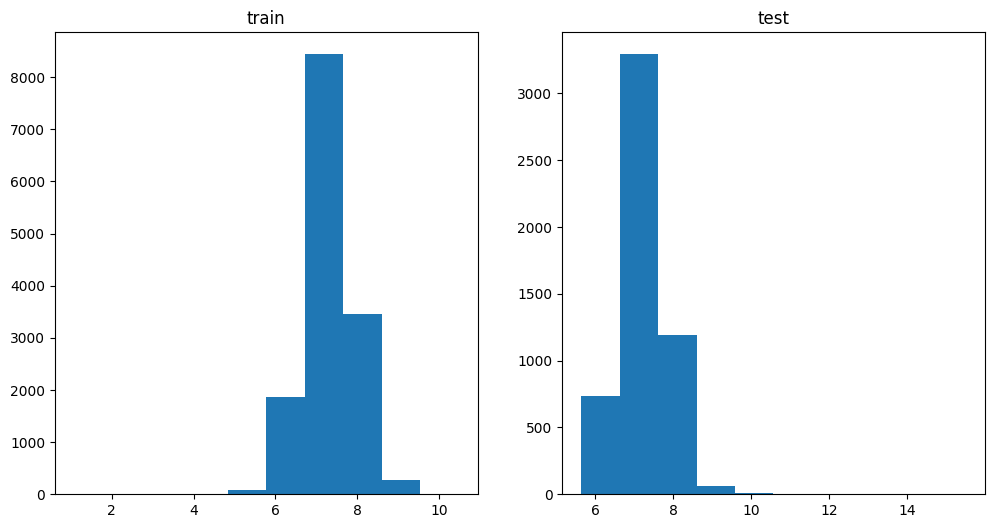

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].hist(train['primary_cleaner.input.feed_size'], bins = 10)
ax[0].set_title('train')
ax[1].hist(test['primary_cleaner.input.feed_size'], bins = 10)
ax[1].set_title('test')

Text(0.5, 1.0, 'test')

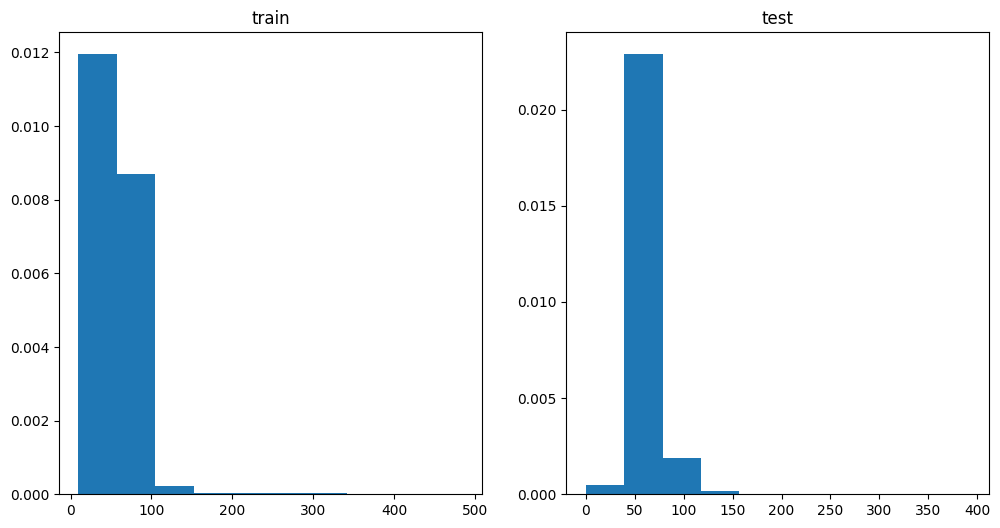

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].hist(train['rougher.input.feed_size'], density=True, bins = 10)
ax[0].set_title('train')
ax[1].hist(test['rougher.input.feed_size'], density=True, bins = 10)
ax[1].set_title('test')

In [ ]:
stats.ttest_ind(train['primary_cleaner.input.feed_size'], test['primary_cleaner.input.feed_size'], equal_var=False)

Ttest_indResult(statistic=5.6817691264522585, pvalue=1.3721938409942596e-08)

In [ ]:
stats.ttest_ind(train['rougher.input.feed_size'], test['rougher.input.feed_size'], equal_var=False)

Ttest_indResult(statistic=13.153756193624949, pvalue=3.134338776805464e-39)

По t-test'у размеры гранул в обучающей и тестовой выборке значимо отличаются. Стоит обратиться за консультацией к специалистам и попросить оценить степень влияния этого параметра на результат.

### Суммарная концентрация

Рассчитаем суммарную концентрацию веществ на 3 стадиях процесса.

In [ ]:
sum_rougher = train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + \
                    + train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_sol']

sum_feed = train['rougher.input.feed_ag'] + train['rougher.input.feed_pb'] + \
                + train['rougher.input.feed_au'] + train['rougher.input.feed_sol']

sum_final = train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] + \
            + train['final.output.concentrate_au'] + train['final.output.concentrate_sol']


Text(0.5, 1.0, 'Вторичная чистка')

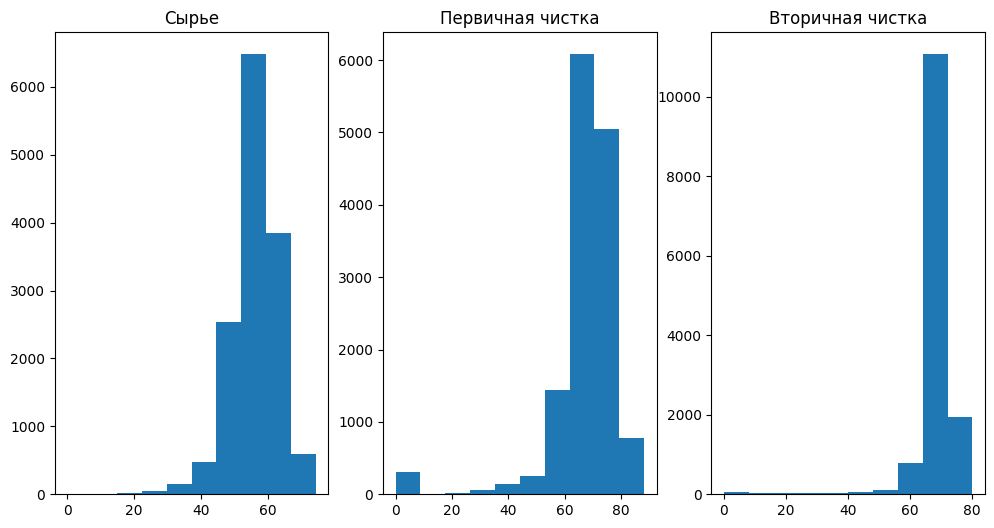

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6))
ax[0].hist(sum_feed, bins = 10)
ax[0].set_title('Сырье')
ax[1].hist(sum_rougher, bins = 10)
ax[1].set_title('Первичная чистка')
ax[2].hist(sum_final, bins = 10)
ax[2].set_title('Вторичная чистка')

In [ ]:
print('Медианные значения')
print('Сырье -', sum_feed.median())
print('Первичная очистка -', sum_rougher.median())
print('Вторичная очистка -', sum_final.median())

Медианные значения
Сырье - 56.627635395399984
Первичная очистка - 69.17566260005924
Вторичная очистка - 69.14150193424052


In [ ]:
print(f_oneway(sum_rougher, sum_feed, sum_final))

F_onewayResult(statistic=7294.7258810500425, pvalue=0.0)


C помощью однофакторного ANOVA сравним средние выборок и увидим, что они статистически значимо отличаются.

In [ ]:
train_copy = train
col = list(train_copy.columns)
col.remove('date')
for i in col: 
    train_copy = train_copy.loc[train_copy[i]!=0]

In [ ]:
sum_rougher = train_copy['rougher.output.concentrate_ag'] + train_copy['rougher.output.concentrate_pb'] + \
                    + train_copy['rougher.output.concentrate_au'] + train_copy['rougher.output.concentrate_sol']

sum_feed = train_copy['rougher.input.feed_ag'] + train_copy['rougher.input.feed_pb'] + \
                + train_copy['rougher.input.feed_au'] + train_copy['rougher.input.feed_sol']

sum_final = train_copy['final.output.concentrate_ag'] + train_copy['final.output.concentrate_pb'] + \
            + train_copy['final.output.concentrate_au'] + train_copy['final.output.concentrate_sol']

In [ ]:
print('Медианные значения')
print('Сырье -', sum_feed.median())
print('Первичная очистка -', sum_rougher.median())
print('Вторичная очистка -', sum_final.median())

Медианные значения
Сырье - 56.6487166646107
Первичная очистка - 69.26251018641904
Вторичная очистка - 69.14132928848267


In [ ]:
print(f_oneway(sum_rougher, sum_feed, sum_final))

F_onewayResult(statistic=14602.236709536894, pvalue=0.0)


## Построение модели

Отберем данные, которые можно использовать для получения предсказаний - для предсказания флотации можно использовать только ее характеристики, для предсказания вторичной очистки - все представленные в test датасете параметры.

In [ ]:
col_rough = ['date', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',]

In [ ]:
col_final = list(test.columns)

In [ ]:
X_rough = train_copy[col_rough]

In [ ]:
X_final = train_copy[col_final]

Посчитаем корреляцию между параметрами.

In [ ]:
X_rough.corr()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
rougher.input.feed_ag,1.000000,0.496164,-0.165287,-0.082923,0.104937,0.844195,0.135763,0.160057,0.151548,0.161213,...,-0.135908,-0.111097,-0.186167,-0.103426,-0.191420,-0.105252,-0.119765,-0.101157,-0.123793,-0.100585
rougher.input.feed_pb,0.496164,1.000000,-0.176378,-0.050150,0.094964,0.699412,0.294165,0.037113,0.291071,0.028340,...,-0.276495,-0.122302,-0.265993,-0.113028,-0.355701,-0.113185,-0.348477,-0.115948,-0.325709,-0.114486
rougher.input.feed_rate,-0.165287,-0.176378,1.000000,0.173837,0.562926,-0.228342,0.071232,0.596458,0.173922,0.601205,...,-0.148805,-0.202262,-0.186012,-0.212790,-0.162064,-0.206455,-0.091566,-0.220265,-0.088404,-0.213263
rougher.input.feed_size,-0.082923,-0.050150,0.173837,1.000000,0.170831,-0.142862,-0.103113,0.091157,-0.133445,0.051688,...,-0.140829,0.005974,-0.164515,0.011250,-0.159261,0.020987,-0.067470,0.006385,-0.059412,0.003516
rougher.input.feed_sol,0.104937,0.094964,0.562926,0.170831,1.000000,0.076791,0.188424,0.330770,0.214099,0.310307,...,-0.181515,-0.122687,-0.202129,-0.111975,-0.244112,-0.111845,-0.209803,-0.115807,-0.187856,-0.115033
rougher.input.feed_au,0.844195,0.699412,-0.228342,-0.142862,0.076791,1.000000,0.308371,0.110789,0.312590,0.114761,...,-0.142291,-0.085434,-0.150848,-0.082805,-0.194699,-0.083415,-0.187121,-0.080339,-0.207999,-0.076989
rougher.input.floatbank10_sulfate,0.135763,0.294165,0.071232,-0.103113,0.188424,0.308371,1.000000,-0.077028,0.890820,-0.132721,...,0.047149,0.213668,0.083110,0.225269,0.013550,0.228193,-0.114069,0.215985,-0.102252,0.222276
rougher.input.floatbank10_xanthate,0.160057,0.037113,0.596458,0.091157,0.330770,0.110789,-0.077028,1.000000,-0.047127,0.907568,...,-0.084330,-0.375034,-0.154474,-0.382722,-0.106619,-0.377579,0.046968,-0.377481,0.032041,-0.373011
rougher.input.floatbank11_sulfate,0.151548,0.291071,0.173922,-0.133445,0.214099,0.312590,0.890820,-0.047127,1.000000,0.050989,...,-0.002362,0.110810,0.036120,0.118795,-0.024929,0.126040,-0.151240,0.110599,-0.145124,0.114236
rougher.input.floatbank11_xanthate,0.161213,0.028340,0.601205,0.051688,0.310307,0.114761,-0.132721,0.907568,0.050989,1.000000,...,-0.123200,-0.419205,-0.177930,-0.427838,-0.127856,-0.419700,0.009909,-0.424373,-0.015953,-0.422983


In [ ]:
X_final.corr()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
primary_cleaner.input.sulfate,1.000000,0.472069,0.159485,0.242370,0.038760,-0.045623,0.065524,-0.041709,0.055998,-0.035239,...,0.101158,0.064381,0.145461,-0.035660,0.017151,-0.018950,0.025014,-0.013213,-0.093658,-0.155373
primary_cleaner.input.depressant,0.472069,1.000000,0.174337,0.279971,-0.137620,0.120100,-0.089046,0.135906,-0.111990,0.139597,...,-0.219792,-0.136728,-0.095440,-0.279447,-0.233563,-0.152148,-0.192292,-0.145779,-0.142059,-0.141877
primary_cleaner.input.feed_size,0.159485,0.174337,1.000000,-0.029073,-0.129949,0.082118,-0.133016,0.085227,-0.161048,0.083266,...,-0.335783,0.137729,-0.246985,0.037817,-0.240300,0.139816,-0.220978,0.142584,0.153427,0.069714
primary_cleaner.input.xanthate,0.242370,0.279971,-0.029073,1.000000,0.061425,0.018454,0.089205,0.014524,0.051995,0.012884,...,0.044350,-0.232078,0.021005,-0.345785,-0.085806,-0.215077,-0.095416,-0.213248,-0.233835,-0.082922
primary_cleaner.state.floatbank8_a_air,0.038760,-0.137620,-0.129949,0.061425,1.000000,0.167176,0.946266,0.176410,0.944639,0.176300,...,0.542458,0.312723,0.511809,0.203825,0.549555,0.245698,0.490838,0.242300,0.300562,0.050163
primary_cleaner.state.floatbank8_a_level,-0.045623,0.120100,0.082118,0.018454,0.167176,1.000000,0.128366,0.978354,0.163544,0.964518,...,-0.044485,0.071840,0.106882,-0.038557,0.016415,0.114104,0.078456,0.095959,0.188290,0.187897
primary_cleaner.state.floatbank8_b_air,0.065524,-0.089046,-0.133016,0.089205,0.946266,0.128366,1.000000,0.153105,0.949912,0.153908,...,0.520815,0.320022,0.503000,0.173144,0.541008,0.250045,0.467812,0.247286,0.293329,0.028143
primary_cleaner.state.floatbank8_b_level,-0.041709,0.135906,0.085227,0.014524,0.176410,0.978354,0.153105,1.000000,0.173275,0.969017,...,-0.068565,0.082186,0.092071,-0.029541,-0.003577,0.127458,0.055863,0.108457,0.183173,0.193063
primary_cleaner.state.floatbank8_c_air,0.055998,-0.111990,-0.161048,0.051995,0.944639,0.163544,0.949912,0.173275,1.000000,0.173632,...,0.591096,0.298122,0.586292,0.189493,0.589452,0.208722,0.547102,0.215495,0.261370,0.033808
primary_cleaner.state.floatbank8_c_level,-0.035239,0.139597,0.083266,0.012884,0.176300,0.964518,0.153908,0.969017,0.173632,1.000000,...,-0.064382,0.077748,0.093384,-0.033486,-0.003423,0.120975,0.054029,0.102597,0.178343,0.186884


Видим, что присутствуют параметры с высокой корреляцией - в дальнейшем можно воспользоваться методами уменьшения размерности - это ускорит вычисления на больших масштабах и позволит избежать проблем мультиколлинеарности.

In [ ]:
y_rough = train_copy['rougher.output.recovery']
y_final = train_copy['final.output.recovery']

### Кросс-валидация

In [ ]:
def smape(pred, true):
    return 100/len(pred) * np.sum(2 * np.abs(true - pred) / (np.abs(pred) + np.abs(true)))

In [ ]:
scorer = make_scorer(smape, greater_is_better = False)

Проведем поиск оптимальных гиперпараметров для случайного леса с помощью кросс-валидации.

In [ ]:
rf = RandomForestRegressor(random_state = 42)
par = {'n_estimators': range (2, 20, 2),
        'max_depth': range (2, 15)}

In [ ]:
grid_r = GridSearchCV(rf, par, cv=4, verbose = 2, scoring = scorer)
grid_r.fit(X_rough.iloc[: , 1:], y_rough)
grid_r.best_params_

Fitting 4 folds for each of 117 candidates, totalling 468 fits
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.2s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.2s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.2s
[CV] END ........................max_depth=2, 

{'max_depth': 4, 'n_estimators': 4}

In [ ]:
grid_f = GridSearchCV(rf, par, cv=4, verbose = 2, scoring = scorer)
grid_f.fit(X_final.iloc[: , 1:], y_final)
grid_f.best_params_

Fitting 4 folds for each of 117 candidates, totalling 468 fits
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.2s
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.2s
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.2s
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.2s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.4s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.4s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.4s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.3s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.5s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.5s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.5s
[CV] END ........................max_depth=2, 

{'max_depth': 2, 'n_estimators': 6}

### Объединение данных

Для того, чтобы проверить модель, нам необходимо отобрать из датасета full соответствующие по дате-времени ответы для датасета test: 

In [ ]:
targets = full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [ ]:
targets

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016
...,...,...,...
19434,2018-08-18 06:59:59,89.574376,73.755150
19435,2018-08-18 07:59:59,87.724007,69.049291
19436,2018-08-18 08:59:59,88.890579,67.002189
19437,2018-08-18 09:59:59,89.858126,65.523246


In [ ]:
test_copy = test
test_copy

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [ ]:
test_copy['date'] = test_copy['date'].dt.ceil('H')

targets['date'] = targets['date'].dt.ceil('H')


<ipython-input-60-bb6a90dc257e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['date'] = targets['date'].dt.ceil('H')


Объединим таблицы, проверим на дупликаты и удалим повторяющиеся значения.

In [ ]:
df_merged = pd.merge(test_copy, targets, left_on='date', right_on='date')
df_merged

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 01:00:00,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 02:00:00,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 03:00:00,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 04:00:00,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 05:00:00,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 20:00:00,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,95.172585,68.919891
5286,2017-12-31 21:00:00,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,94.575036,68.440582
5287,2017-12-31 22:00:00,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,93.018138,67.092759
5288,2017-12-31 23:00:00,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,92.599042,68.061186


In [ ]:
df_merged['date'].duplicated().sum()

0

In [ ]:
df_merged.dropna(inplace=True)

### Оценка качества модели

Получим предсказания на предобученных моделях с оптимальными гиперпараметрами:

In [ ]:
X_test_r = df_merged[col_rough]

In [ ]:
X_test_f = df_merged[col_final]

In [ ]:
y_test_r = df_merged['rougher.output.recovery']
y_test_f = df_merged['final.output.recovery']

In [ ]:
pred_r = grid_r.predict(X_test_r.iloc[:, 1:])

In [ ]:
pred_f = grid_f.predict(X_test_f.iloc[:, 1:])

Рассчитаем метрику sMAPE для предсказаний:

In [ ]:
final_smape = 0.25*smape(pred_r, y_test_r) + 0.75*smape(pred_f, y_test_f)
final_smape

8.89692427789187

In [ ]:
dummy_regr_r = DummyRegressor(strategy="mean")
dummy_regr_r.fit(X_rough.iloc[: , 1:], y_rough)
pred_d_r = dummy_regr_r.predict(X_test_r)
dummy_regr_f = DummyRegressor(strategy="mean")
dummy_regr_f.fit(X_final.iloc[: , 1:], y_final)
pred_d_f = dummy_regr_f.predict(X_test_f)

final_smape_d = 0.25*smape(pred_d_r, y_test_r) + 0.75*smape(pred_d_f, y_test_f)
final_smape_d

9.945640295689593

In [ ]:
dummy_regr_r = DummyRegressor(strategy="median")
dummy_regr_r.fit(X_rough.iloc[: , 1:], y_rough)
pred_d_r = dummy_regr_r.predict(X_test_r)
dummy_regr_f = DummyRegressor(strategy="mean")
dummy_regr_f.fit(X_final.iloc[: , 1:], y_final)
pred_d_f = dummy_regr_f.predict(X_test_f)

final_smape_d = 0.25*smape(pred_d_r, y_test_r) + 0.75*smape(pred_d_f, y_test_f)
final_smape_d

9.808298040153744

## Вывод

В ходе решения поставленной задачи была проведена подготовка данных, проанализированы требуемые параметры (изменение концентраций металлов, сравнение размеров гранул в выборках). С помощью кросс-валидации были получены лучшие гиперпараметры для модели RandomForestRegressor(), затем на датасете test была проведена оценка качества модели - sMAPE составил 8.89692427789187.

sMAPE dummy-модели: 9.808298040153744.

Промежуточные выводы: 

*   В предоставленных данных присутствовали точки с нулевым recovery.
*   В ходе очистки концентрация свинца и золота увеличивается, серебра - уменьшается.
* Размеры гранул в обучающей и тестовой выборке статистически значимо отличаются.  
* Суммарная концентрация веществ меняется по ходу очистки

